In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

Analysing dataset

In [4]:
BF=pd.read_csv('/content/BlackFriday.csv')

In [ ]:
BF.head()

In [4]:
BF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
BF.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


Delecting the null column with more than 50% of null values

In [5]:
del BF['Product_Category_2']
del BF['Product_Category_3']


In [8]:
BF

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


Analysing columns

In [9]:
BF['User_ID'].nunique()

5891

In [10]:
BF['Product_ID'].nunique()

3623

In [11]:
BF['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
BF['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
BF['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [14]:
BF['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
BF['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
for column in BF.columns:
    print(column, ":" ,BF[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


Ploting with the data

<Axes: ylabel='Ratio'>

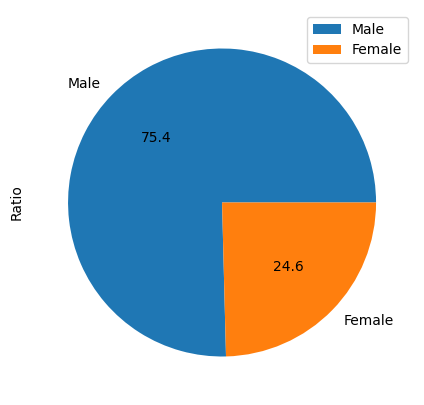

In [19]:
data = pd.DataFrame({'Ratio' : [len(BF[BF['Gender'] == 'M']), len(BF[BF['Gender'] == 'F'])]},
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (5,5), autopct = "%.1f")

In [21]:
BF.groupby('Gender').size()

,0
Gender,
F,132197
M,405380


<Axes: xlabel='Gender'>

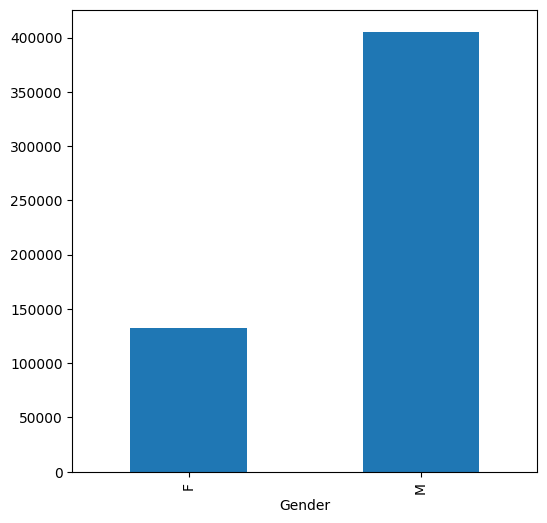

In [22]:
BF.groupby('Gender').size().plot(kind = 'bar',
                                 figsize = (6,6))

<Axes: ylabel='Purchase'>

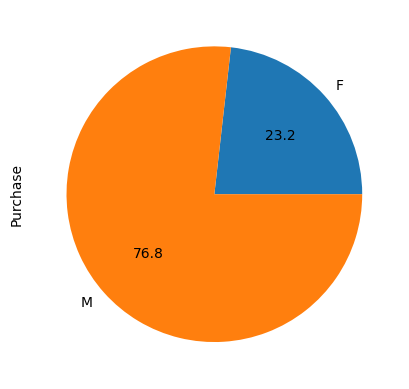

In [6]:
BF.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<Axes: title={'center': 'Purchase Data by Age'}, xlabel='Age'>

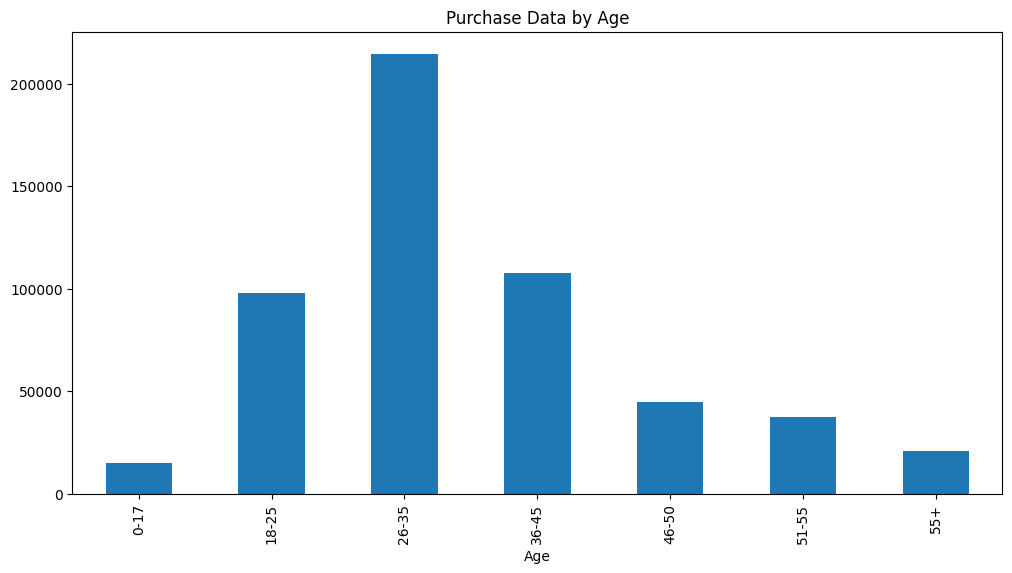

In [7]:
BF.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Data by Age')

<Axes: xlabel='Age'>

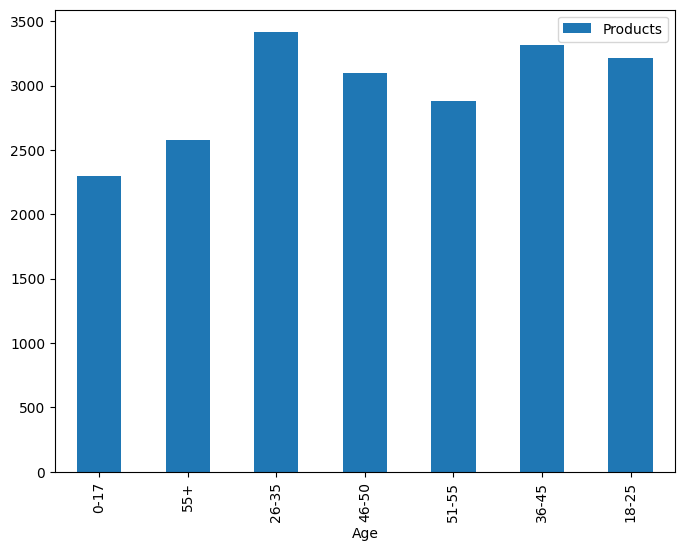

In [9]:
lst = []
for i in BF['Age'].unique():
    lst.append([i, BF[BF['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst , columns = ['Age','Products'])
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

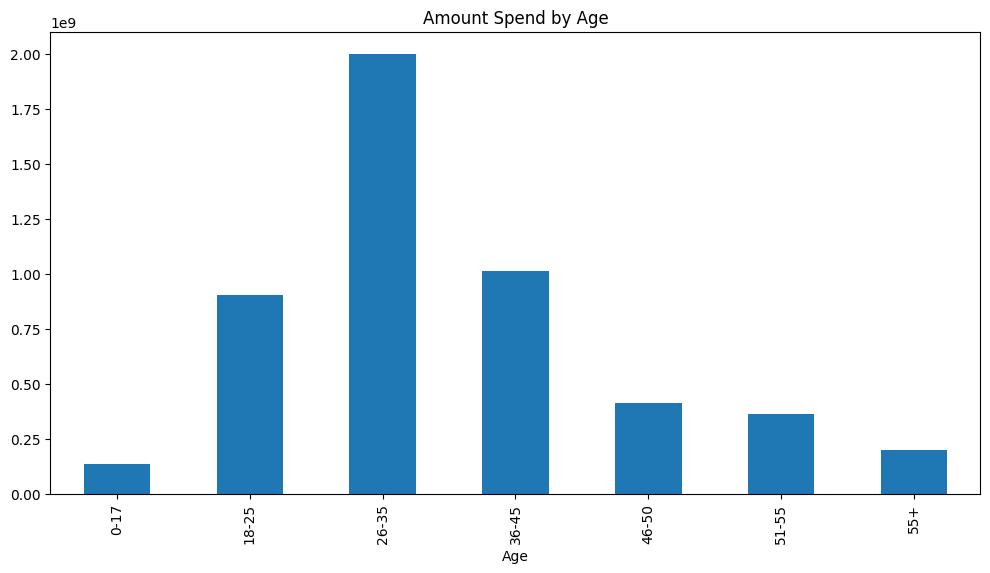

In [10]:
BF.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: xlabel='Age', ylabel='count'>

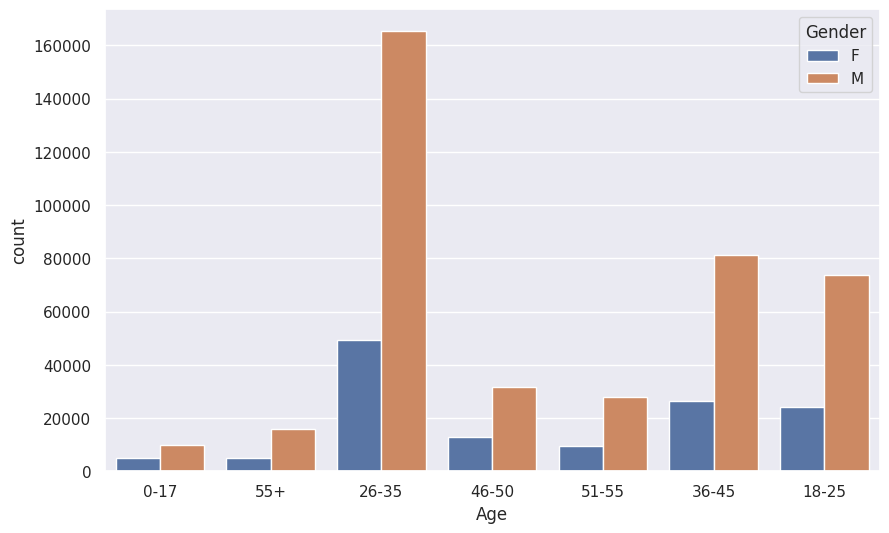

In [12]:
sb.set(rc = {'figure.figsize' : (10,6)})
sb.countplot(x = "Age", hue = 'Gender', data = BF)

<Axes: xlabel='Gender', ylabel='count'>

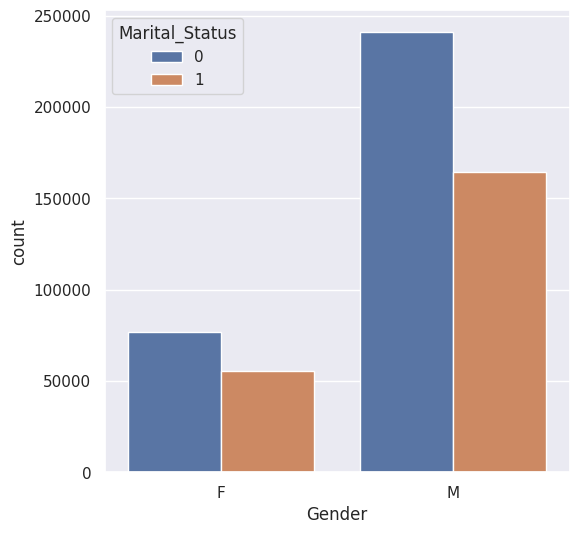

In [13]:
sb.set(rc = {'figure.figsize' : (6,6)})
sb.countplot(x = "Gender", hue = 'Marital_Status', data = BF)

<Axes: xlabel='Age', ylabel='count'>

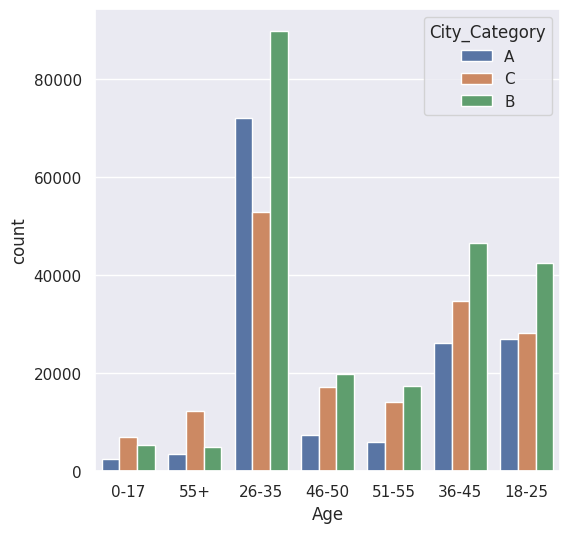

In [14]:
sb.countplot(x = 'Age', hue = 'City_Category', data = BF)

<Axes: xlabel='City_Category', ylabel='count'>

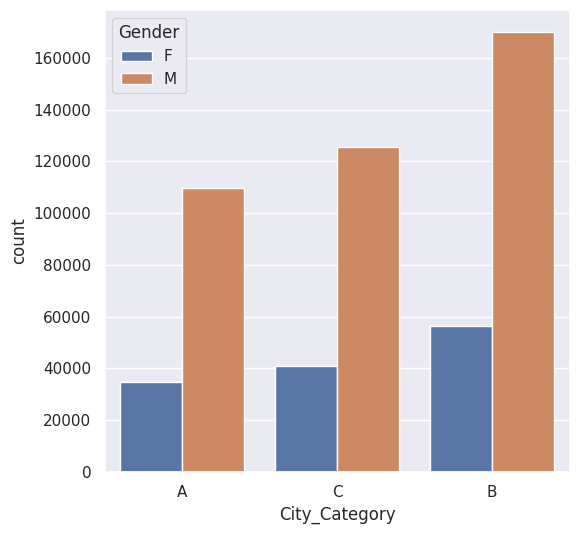

In [16]:
sb.countplot(x = 'City_Category', hue = 'Gender', data = BF)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

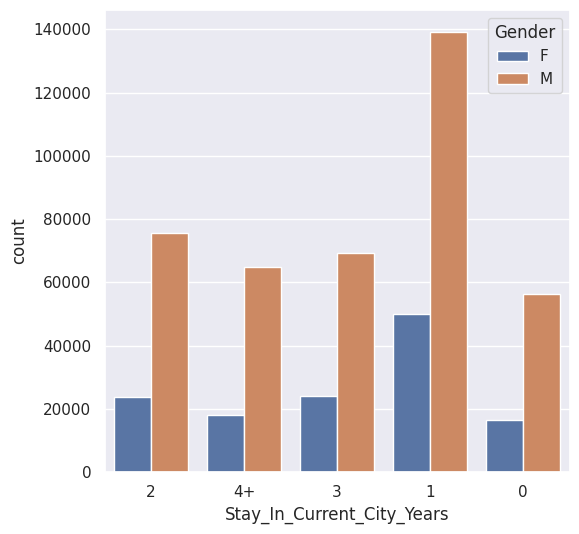

In [20]:
sb.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = BF)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

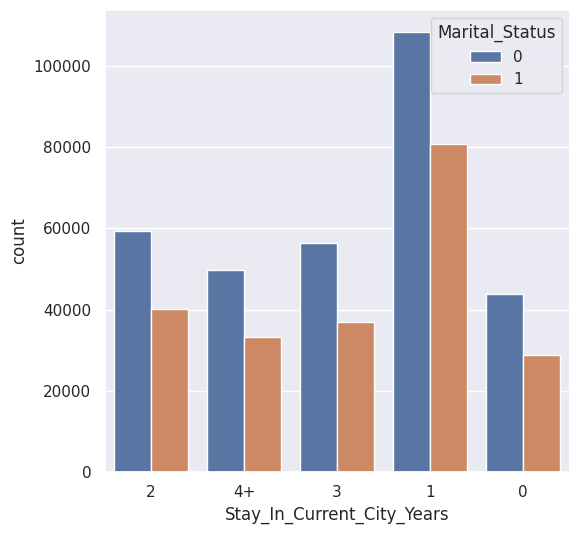

In [21]:
sb.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = BF)

<Axes: xlabel='Stay_In_Current_City_Years'>

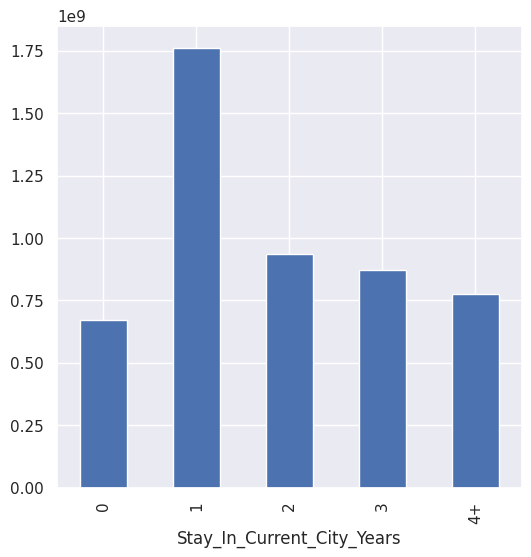

In [22]:
BF.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

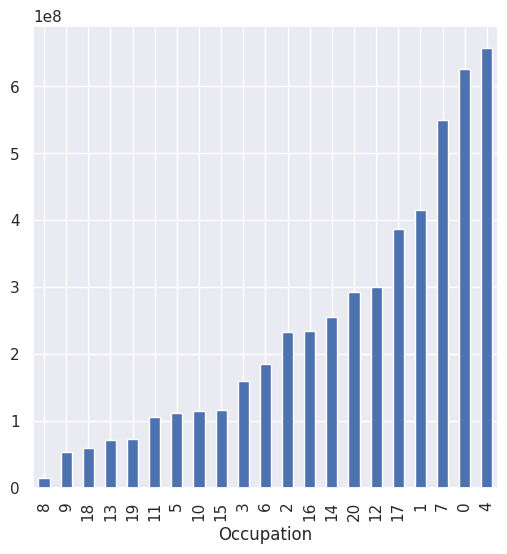

In [23]:

BF.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

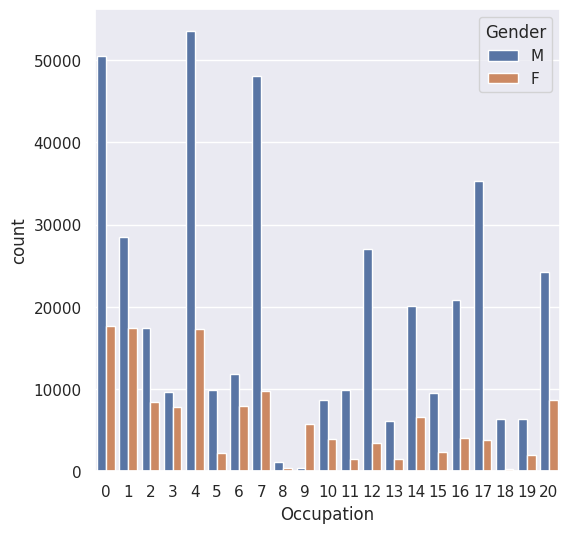

In [24]:
sb.countplot(x = 'Occupation', hue = 'Gender', data = BF)

<Axes: xlabel='Occupation'>

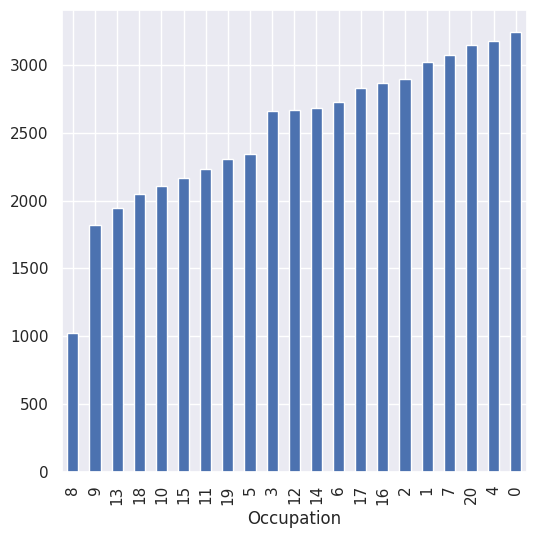

In [25]:
BF.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

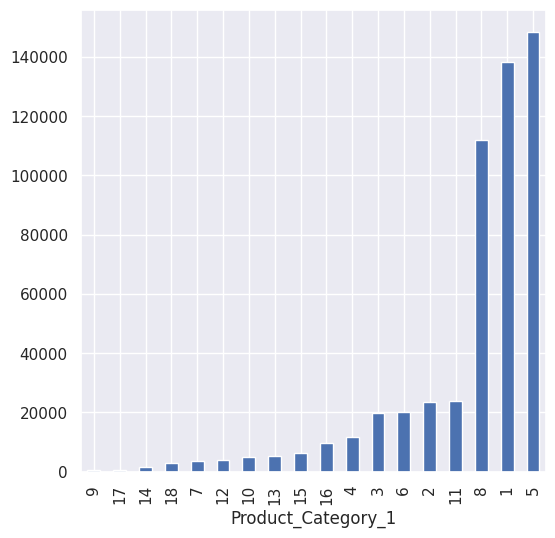

In [26]:
BF.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

Creating a new column in a dataset

In [27]:
l = []
for i in range(len(BF)):
    l.append(BF['Gender'][i] +"_"+ str(BF['Marital_Status'][i]))

BF['MaritalGender'] = l

ploting with a new dataset

<Axes: xlabel='MaritalGender', ylabel='count'>

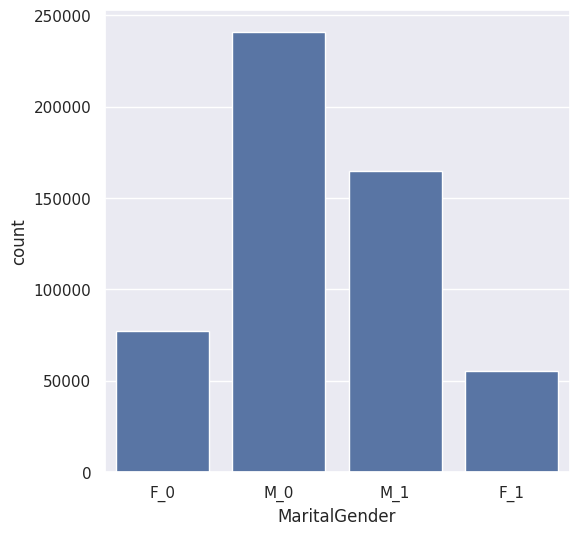

In [29]:
sb.countplot(x = BF['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

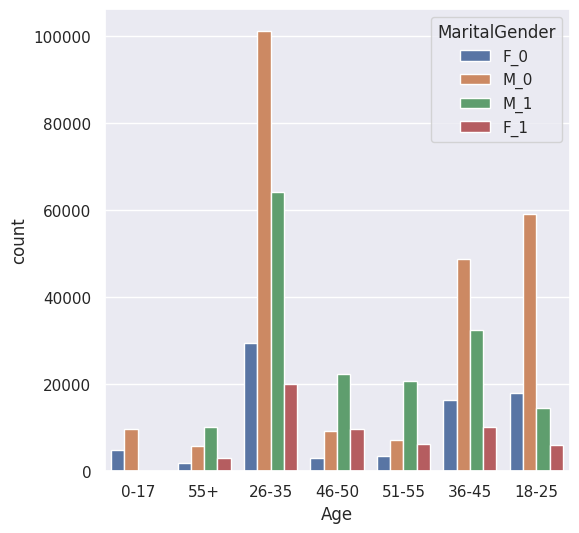

In [30]:
sb.countplot(x = BF['Age'], hue = BF['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

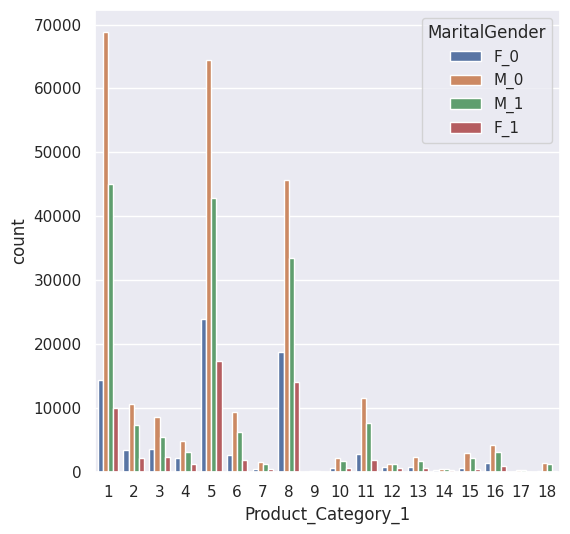

In [31]:
sb.countplot(x = BF['Product_Category_1'], hue = BF['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

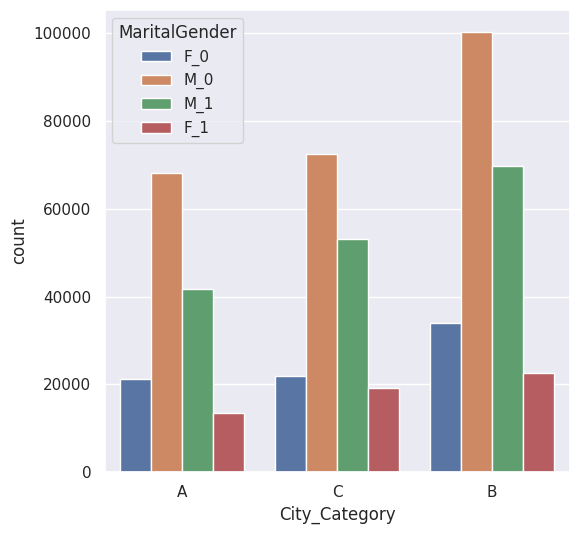

In [32]:
sb.countplot(x = BF['City_Category'], hue = BF['MaritalGender'])